<a href="https://colab.research.google.com/github/sundarp17/sundar_info5731_fall2020/blob/master/In_class_exercise_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The eighth in-class-exercise (20 points in total, 10/29/2020)**

The data for this exercise is from the dataset you created from assignment three. Please perform answer the following questions based on your data:

## (1) (10 points) Write a python program to extract the sentiment related terms from the corpus. You may use python package such as polyglot or external lexicon resources in the question. Rank the sentiment related terms by frequency.

In [1]:
# Write your code here
import pandas as pd
df = pd.read_csv('/content/sentimental_analysis.csv')
df.head()




,Review,sentiment
0,"Every once in a while a movie comes, that trul...",positive
1,This is a movie that only those who have felt ...,positive
2,"Truly a masterpiece, The Best Hollywood film o...",positive
3,Joaquin Phoenix gives a tour de force performa...,positive
4,Most of the time movies are anticipated like t...,positive


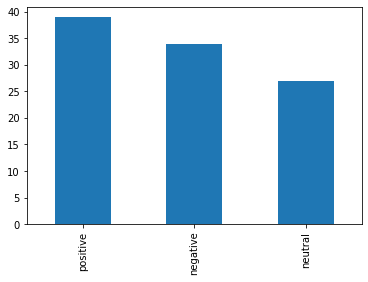

In [2]:
import matplotlib.pyplot as plt
df['sentiment'].value_counts().plot(kind='bar')

In [3]:
#pre-processing
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from textblob import Word
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import string
stop = stopwords.words('english')


df['Review'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Review'] = df['Review'].apply(lambda  x: " ".join(x for x in x.split() if x not in string.punctuation))
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Review,sentiment
0,"every movie comes, truly make impact. joaquin'...",positive
1,movie felt alone isolated truly relate it. und...,positive
2,"truly masterpiece, best hollywood film 2019, o...",positive
3,joaquin phoenix give tour de force performance...,positive
4,"time movie anticipated like end falling short,...",positive


In [11]:
from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in df['Review']:
  words_sentence.append(word_tokenize(sentence))
words_sentence[:5]

[['every',
  'movie',
  'comes',
  ',',
  'truly',
  'make',
  'impact',
  '.',
  'joaquin',
  "'s",
  'performance',
  'scenography',
  'brilliance',
  '.',
  'grotesque',
  ',',
  'haunting',
  'cringy',
  '.',
  'hard',
  'watch',
  'times',
  ',',
  '...',
  'mesmerizing',
  ',',
  'blink',
  'eye',
  'watching',
  'it',
  '.',
  'tragic',
  ',',
  'seriously',
  'funny',
  'moments',
  '.',
  'emotional',
  'rollercoaster',
  'sometimes',
  ',',
  'multiple',
  'emotion',
  'popping-up',
  'time.this',
  'far',
  'typical',
  'action-riddled',
  'predictable',
  'super-hero',
  'movie',
  'proper',
  'psychological',
  'thriller/drama',
  ',',
  'single',
  'best',
  'character',
  'development',
  'ever',
  'seen',
  '.'],
 ['movie',
  'felt',
  'alone',
  'isolated',
  'truly',
  'relate',
  'it',
  '.',
  'understand',
  'motive',
  'feel',
  'sorry',
  'character',
  '.',
  'lot',
  'people',
  'see',
  'movie',
  'think',
  'encourages',
  'violence',
  '.',
  'truly',
  ',',

In [22]:
import itertools
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))
iterations[:5]

['every', 'movie', 'comes', ',', 'truly']

In [6]:
sentiment_list = df.to_records(index=False)
sentiment_list = list(sentiment_list)
sentiment_list[:5]

[("every movie comes, truly make impact. joaquin's performance scenography brilliance. grotesque, haunting cringy. hard watch times,... mesmerizing, blink eye watching it. tragic, seriously funny moments. emotional rollercoaster sometimes, multiple emotion popping-up time.this far typical action-riddled predictable super-hero movie proper psychological thriller/drama, single best character development ever seen.", 'positive'),
 ('movie felt alone isolated truly relate it. understand motive feel sorry character. lot people see movie think encourages violence. truly, movie encourage every one u become better person, treat everyone respect make feel like belong world, instead making feel isolated.', 'positive'),
 ("truly masterpiece, best hollywood film 2019, one best film decade... truly best film bring comic book chillingly realistically real ife. remarkable direction, cinematography, music acting. people surprised find disturbing violent, necessity message. society reflects underapprec

In [14]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in iterations:
        features['contains({})'.format(word)] = (word in document_words)
    return features


In [48]:
#accuracy
featuresets = [(document_features(d), c) for (d,c) in sentiment_list]
train_set, test_set = featuresets[:80], featuresets[80:]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.45


In [26]:
#top 5 features
classifier.show_most_informative_features(5)

Most Informative Features
contains(joaquin' portrayal sociopathic, mentally unstable man's transformation iconic joker non grippingly accurate, realistic touching rendition. dark disturbing character piece led oscar worthy performance joaquin phoenix. really feel bad guy, make heartbreaking inevitably becomes clown prince crime know love, although we've never seen like this. see suffer throughout movie point we're almost rooting himk become mass murdering psyco clown, least make feel better; happens wish could avoided, e messed up. feel care him. time he's joker, wish could've helped him. there's lot great nod greater batman universe, yet movie self contained character piece. mark great movie. acting great, plot (while similar taxi driver) brilliant quality movie show need cgi super power great villain superhero movie. joke everyone gets. movie "the rise joker!" 10/10) = False          positi : negati =      1.0 : 1.0
contains(joaquin phoenix give heath ledger run money, true story. po

## (2) (10 points) Compare the performance of the following tools in sentiment identification: TextBlob (https://textblob.readthedocs.io/en/dev/), VADER (https://github.com/cjhutto/vaderSentiment), TFIDF-based Support Vector Machine (SVM) (Split your data into training and testing data). Take your own annotation as the standard answers. 

Reference code: https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4

In [30]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 2.7MB/s 


In [61]:
# Write your code here
#text blob
from textblob import TextBlob
polar=[]
for i in df['Review']:
  blob = TextBlob(i)
  for sentence in blob.sentences:
    polar.append(sentence.sentiment.polarity)
neutral=0
pos=0
neg=0
for i in polar:
  if i==0.0:
    neutral+=1
  elif i>0:
    pos+=1
  else: neg+=1


print("positive",pos)
print("negative",neg)
print("neutral",neutral)



positive 385
negative 200
neutral 210


In [35]:
#vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))
for i in df['Review'][:5]:
  sentiment_analyzer_scores(i)

every movie comes, truly make impact. joaquin's performance scenography brilliance. grotesque, haunting cringy. hard watch times,... mesmerizing, blink eye watching it. tragic, seriously funny moments. emotional rollercoaster sometimes, multiple emotion popping-up time.this far typical action-riddled predictable super-hero movie proper psychological thriller/drama, single best character development ever seen. {'neg': 0.133, 'neu': 0.616, 'pos': 0.251, 'compound': 0.8519}
movie felt alone isolated truly relate it. understand motive feel sorry character. lot people see movie think encourages violence. truly, movie encourage every one u become better person, treat everyone respect make feel like belong world, instead making feel isolated. {'neg': 0.193, 'neu': 0.434, 'pos': 0.373, 'compound': 0.9042}
truly masterpiece, best hollywood film 2019, one best film decade... truly best film bring comic book chillingly realistically real ife. remarkable direction, cinematography, music acting. pe

In [56]:
#TF-IDF -SVM
train=df[:80]
test=df[80:]
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(train['Review'])
test_vectors = vectorizer.transform(test['Review'])

In [55]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(test['sentiment'], prediction_linear, output_dict=True)
print('positive: ', report['positive'])
print('negative: ', report['negative'])
print("neutral:", report['neutral'])

Training time: 0.007710s; Prediction time: 0.001469s
positive:  {'precision': 0.875, 'recall': 0.7777777777777778, 'f1-score': 0.823529411764706, 'support': 9}
negative:  {'precision': 0.375, 'recall': 0.5, 'f1-score': 0.42857142857142855, 'support': 6}
neutral: {'precision': 0.5, 'recall': 0.4, 'f1-score': 0.4444444444444445, 'support': 5}


Performance of the models:

Textblob: I think it is best, if we use textblob when we have individual sentences as the input but not the group of sentences as input.
using textblob, the number of positive sentences are 385, number of negative sentences are 200 and neutral are 210. That means, we can say that number of positives are more. If we see the bar chart, the number of positives are more. So, I can say that textblob is accurate.

Vader: Using vader, I saw the first 5 sentences. All the sentences has more neutral values, whereas while annotating, I gave the sentiment for those sentences as positive. So, I think vader is not accurate.

SVM: using TF-IDF svm, i got the precision value more for positive values (0.875) and f-score of 0.82. So, I can say positive values are accurate. So, I can say it is also accurate for upto postive values.

In conclusion, I can say that textblob is better than SVM and vader. SVM is better when compared to vader.